# Imports

In [1]:
# Adding parent dir to sys.path to import functions
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
from data.data_handler import Data
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

c:\Users\bjham\Documents\programming\venvs\predict-at-bat-outcome\dev\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Gather Data

Using the `Data` class in data_handler.py, the data is gathered into a single pd.DataFrame for analysis.

In [3]:
abs = Data(['F:/baseball/active_player_abs', 'F:/baseball/statcast_running'], ['mlb_id','season'])

# Basic Metrics

Gathering basic stats to help guide future analysis.

## Basic File Information

In [4]:
display(abs.data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778449 entries, 0 to 778448
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player          778449 non-null  object 
 1   mlb_id          778449 non-null  object 
 2   position        778449 non-null  object 
 3   game_date       778449 non-null  object 
 4   pitcher         778449 non-null  object 
 5   result          778449 non-null  object 
 6   exit_velocity   527480 non-null  float64
 7   launch_angle    527426 non-null  float64
 8   distance        485924 non-null  float64
 9   direction       537192 non-null  object 
 10  pitch_velocity  772478 non-null  float64
 11  pitch_type      20674 non-null   object 
 12  season          778449 non-null  int64  
 13  ft/s            772285 non-null  float64
 14  hp-1st          752424 non-null  float64
 15  bolts           277651 non-null  float64
 16  pos_rank        772285 non-null  float64
 17  age_rank  

None

In [5]:
display(abs.data.head())

,player,mlb_id,position,game_date,pitcher,result,exit_velocity,launch_angle,distance,direction,pitch_velocity,pitch_type,season,ft/s,hp-1st,bolts,pos_rank,age_rank,league_rank,percentile
0,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Feliz, Neftali",intent_walk,NaN,NaN,NaN,NaN,50.7,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
1,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"VerHagen, Drew",strikeout,NaN,NaN,NaN,NaN,78.4,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
2,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Verlander, Justin",field_out,82.1,28.0,276.0,Straightaway,93.9,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
3,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Verlander, Justin",strikeout,NaN,NaN,NaN,NaN,88.0,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3
4,Jose Abreu,jose-abreu-547989,1B,2015-10-03,"Verlander, Justin",field_out,80.0,69.0,NaN,Straightaway,78.0,NaN,2015,25.6,4.77,NaN,36.0,52.0,492.0,27.3


In [52]:
print('Distinct years:', pd.to_datetime(abs.data.game_date).dt.year.unique())
print('\nDistinct results:', abs.data.result.unique())
print('\nDistinct positions:', abs.data.position.unique())
print('\nUnique players count:', len(abs.data.mlb_id.unique()))
print('\nUnique opp pitcher count:', len(abs.data.pitcher.unique()))


Distinct years: [2015 2016 2017 2018 2019 2020]

Distinct results: ['intent_walk' 'strikeout' 'field_out' 'single' 'home_run' 'walk' 'double'
 'field_error' 'hit_by_pitch' 'sac_fly' 'grounded_into_double_play'
 'force_out' 'double_play' 'triple' 'fielders_choice_out'
 'fielders_choice' 'strikeout_double_play' 'interf_def' 'triple_play'
 'sac_bunt' 'sac_fly_double_play' 'batter_interference'
 'sac_bunt_double_play']

Distinct positions: ['1B' '2B' '3B' 'CF' 'C' 'DH' 'LF' 'OF' 'RF' 'SS']

Unique players count: 727

Unique opp pitcher count: 1668


## Distributions

In [60]:
pd.to_datetime(abs.data.game_date).dt.year.value_counts()

2019    175027
2018    161789
2017    146028
2016    123405
2015    106792
2020     65408
Name: game_date, dtype: int64

In [61]:
display(abs.data.result.value_counts())

field_out                    309117
strikeout                    165531
single                       114012
walk                          63044
double                        36092
home_run                      26138
force_out                     15584
grounded_into_double_play     15099
hit_by_pitch                   7898
field_error                    6464
sac_fly                        5013
intent_walk                    3944
triple                         3672
sac_bunt                       1969
double_play                    1836
fielders_choice_out            1296
fielders_choice                 807
strikeout_double_play           619
interf_def                      215
sac_fly_double_play              67
triple_play                      21
batter_interference               6
sac_bunt_double_play              5
Name: result, dtype: int64

In [59]:
abs.data.position.value_counts()

2B    107529
3B    105912
1B     96784
LF     92748
C      92724
RF     90439
SS     89674
CF     80382
OF     16760
DH      5497
Name: position, dtype: int64

In [48]:
display(abs.data.describe())

,exit_velocity,launch_angle,distance,pitch_velocity
count,527480.000000,527426.000000,485924.000000,772478.000000
mean,88.448861,12.224473,171.108021,88.775303
std,13.480516,26.956441,136.668563,5.898683
min,5.200000,-89.000000,0.000000,38.100000
25%,80.000000,-6.000000,23.000000,84.700000
50%,90.300000,12.000000,168.000000,89.900000
75%,98.800000,30.000000,293.000000,93.400000
max,122.200000,90.000000,505.000000,105.400000


## Distributions

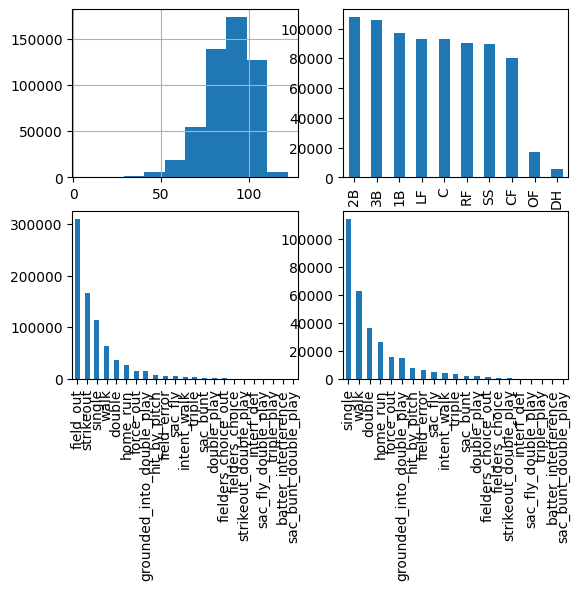

In [46]:
figure, ax = plt.subplots(2,2)

ax1 = abs.data.result.value_counts().plot(kind='bar', ax=ax[1,0])
ax2 = abs.data.position.value_counts().plot(kind='bar', ax=ax[0,1])
ax3 = abs.data.exit_velocity.hist(ax=ax[0,0])
ax4 = abs.data.loc[~abs.data.result.isin(['field_out','strikeout'])].result.value_counts().plot(kind='bar', ax=ax[1,1])


# Result by exit velocity and launch angle

In [10]:
abs.clean()

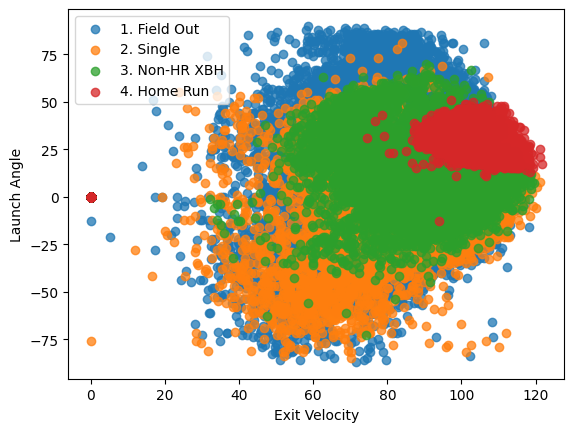

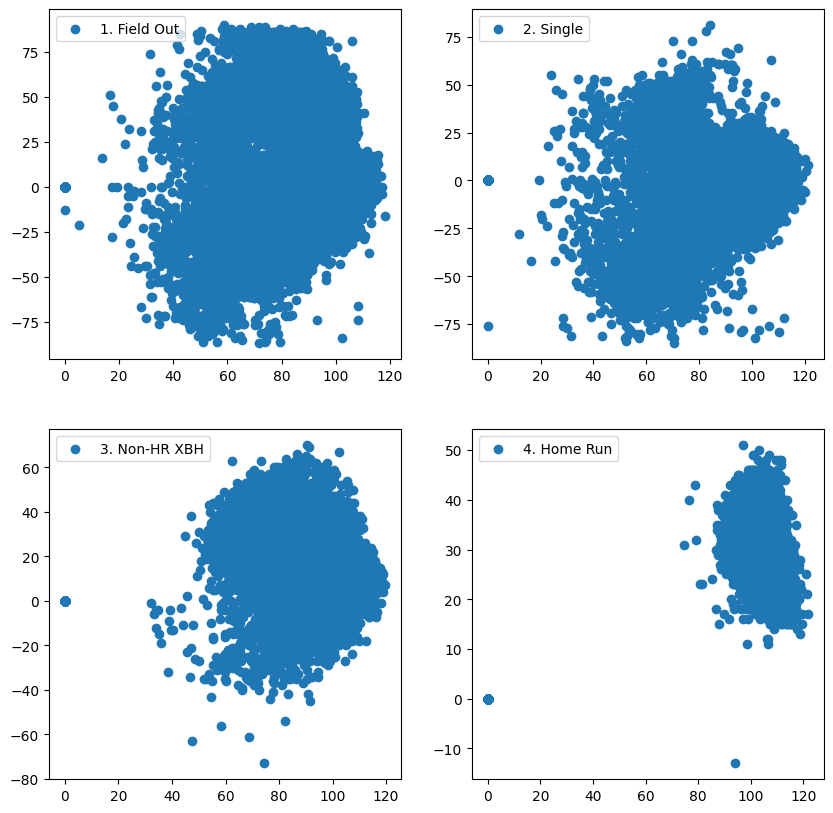

In [80]:
df = abs.data.copy()
df.loc[df.result.eq('field_out'), 'result'] = '1. Field Out'
df.loc[df.result.eq('single'), 'result'] = '2. Single'
df.loc[df.result.eq('non_hr_xbh'), 'result'] = '3. Non-HR XBH'
df.loc[df.result.eq('home_run'), 'result'] = '4. Home Run'

fig1, ax1 = plt.subplots()
fig2 = plt.figure(figsize=(10,10))#.subplots(1, 4)
ax2 = {}
for i in range(1, 5):
    ax2[i] = fig2.add_subplot(int(f'22{i}'))

for k, v in df.groupby('result'):
    ax1.scatter(v['exit_velocity'], v['launch_angle'], label=k, alpha=0.75)

i = 1
for k, v in df.groupby('result'):
    ax2[i].scatter(v['exit_velocity'], v['launch_angle'], label=k)
    i += 1

ax1.legend(loc=2)
ax1.set_xlabel('Exit Velocity')
ax1.set_ylabel('Launch Angle')
[ax2[i].legend(loc=2) for i in range(1, 5)]

# Label Distribution

<AxesSubplot: >

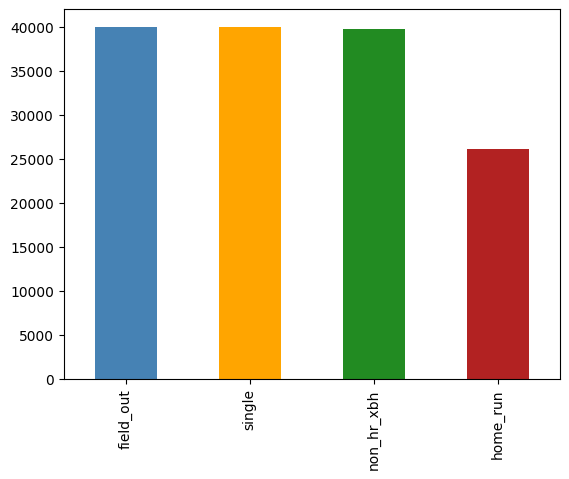

In [87]:
abs.data.result.value_counts().plot.bar(color=['steelblue', 'orange','forestgreen', 'firebrick'])

# Direction distribution

count    145902.000000
mean         26.944931
std           2.655295
min           0.000000
25%          26.100000
50%          27.200000
75%          28.200000
max          30.900000
Name: ft/s, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145902 entries, 4 to 778439
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player          145902 non-null  object 
 1   mlb_id          145902 non-null  object 
 2   position        145902 non-null  object 
 3   game_date       145902 non-null  object 
 4   pitcher         145902 non-null  object 
 5   result          145902 non-null  object 
 6   exit_velocity   145902 non-null  float64
 7   launch_angle    145902 non-null  float64
 8   distance        145902 non-null  float64
 9   direction       145902 non-null  object 
 10  pitch_velocity  145902 non-null  float64
 11  pitch_type      145902 non-null  object 
 12  season          145902 non-nu

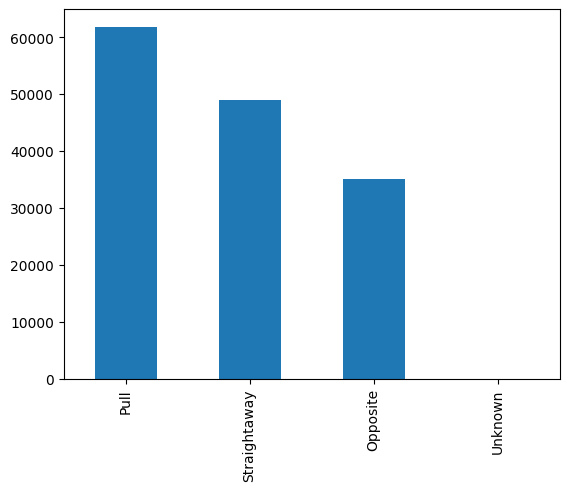

In [97]:
abs.data.loc[~abs.data.direction.isnull()].direction.value_counts().plot.bar()
print(abs.data['ft/s'].describe())
abs.data.info()